# RNN (Recursively Neural Networks)
입력, 출력의 개수에 따라 형태 결정
- 일대일 형태
- 일대다 형태: 시계열 데이터 예측, 감성분석, 번역
- 다대일 형태: 시계열 데이터 예측(ex. 01 서울시 온도예측), 상태감지, 경고 발생
- 다대다 형태: 비디오 분류, 이미지 캡셔닝, 게임 API

Neural Network 구조
- CNN: spatial data (이미지, 비디오)
- RNN: sequential data (순차데이터, 시계열데이터)

# 주가예측 모델 신경망

In [ ]:
!pip install finance-datareader

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

In [ ]:
import pandas as pd
def make_code(x):
    x = str(x)
    return '0'*(6-len(x)) + x

code_data = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download',header=0)[0]
code_data['종목코드'] = code_data['종목코드'].apply(make_code)
code_list = code_data[code_data['상장일'] < '2017-01-01']['종목코드']
code_data.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,AJ네트웍스,095570,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,손삼달,http://www.ajnet.co.kr,서울특별시
1,BGF리테일,282330,종합 소매업,체인화 편의점,2017-12-08,12월,민승배,http://www.bgfretail.com,서울특별시
2,BNK금융지주,138930,기타 금융업,금융지주회사,2011-03-30,12월,빈대인,http://www.bnkfg.com,부산광역시
3,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
4,DS단석,017860,기타 화학제품 제조업,바이오에너지,2023-12-22,12월,한승욱,http://dsdansuk.com,경기도


In [ ]:
code_data[code_data['회사명'].str.contains('SK')]

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
16,SK이노베이션,096770,석유 정제품 제조업,"석유정제,석유화학제품,윤활유제품,아스팔트제품,의약중간체 제조,판매,유전개발,대체에너지사업",2007-07-25,12월,김준,http://www.SKinnovation.com,서울특별시
17,SK케미칼,285130,합성고무 및 플라스틱 물질 제조업,"PETG 수지, PET 수지, 바이오디젤, 백신",2018-01-05,12월,"김철, 안재현",http://www.skchemicals.com,경기도
120,SK증권제8호스팩,435870,금융 지원 서비스업,기업인수목적회사,2022-10-06,12월,김석,NaN,서울특별시
360,SKC,011790,기타 화학제품 제조업,"폴리에스테르필름,합성수지,LCD용 필름 제조",1997-07-18,12월,박원철,http://www.skc.kr,경기도
361,SK디스커버리,006120,기타 금융업,"화섬사(폴리에스테르원사(폴리에스터F,폴리에스터SF),폴리에스터직물,아세테이트),석유...",1976-06-29,12월,"최창원, 전광현",http://www.skdiscovery.com,경기도
362,SK디앤디,210980,부동산 임대 및 공급업,"비주거용 부동산개발 및 임대(오피스, 지식산업센터, 호텔 등)",2015-06-23,12월,김도현,http://www.skdnd.com,경기도
473,SK증권제10호스팩,457940,금융 지원 서비스업,기업인수합병,2023-08-11,12월,장희정,NaN,서울특별시
695,SK가스,018670,기타 전문 도매업,"액화석유가스,가스기기 판매,수입,저장",1997-08-27,12월,윤병석,http://www.skgas.co.kr/,경기도
696,SK네트웍스,001740,기타 전문 도매업,"정보통신 유통, 자동차 관리, 글로벌 트레이딩, 호텔&리조트",1977-06-30,12월,이호정,http://www.sknetworks.co.kr,경기도
697,SK렌터카,068400,운송장비 임대업,승용자동차 임대,2012-07-27,12월,황일문,http://https://company.skcarrental.com,서울특별시


In [ ]:
df = fdr.DataReader('096770', start = '2015' ).reset_index()
df

,Date,Open,High,Low,Close,Volume,Change
0,2015-01-02,82552,83438,82060,82651,271587,-0.012934
1,2015-01-05,82061,82159,79404,80684,512095,-0.023799
2,2015-01-06,78814,80683,78027,78224,496571,-0.030489
3,2015-01-07,77928,80683,77928,78814,366018,0.007542
4,2015-01-08,79994,81372,79305,81077,341889,0.028713
...,...,...,...,...,...,...,...
2210,2023-12-22,138900,139800,137900,138800,259761,0.006526
2211,2023-12-26,139500,139800,136600,137800,310798,-0.007205
2212,2023-12-27,137900,140100,137200,139100,293588,0.009434
2213,2023-12-28,139000,140300,138500,140300,325192,0.008627


Columns
- Date: 주식시장 개장 날짜
- Open: 해당 개장일의 시가
- High: 해당 개장일의 고가
- Low: 해당 개장일의 저가
- Close: 해당 개장일의 종가
- Volume: 해당 개장일의 거래량
- Change: 해당 개장일의 전달 대비 종가 상승률

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,82552,83438,82060,82651,271587,-0.012934
2015-01-05,82061,82159,79404,80684,512095,-0.023799
2015-01-06,78814,80683,78027,78224,496571,-0.030489
2015-01-07,77928,80683,77928,78814,366018,0.007542
2015-01-08,79994,81372,79305,81077,341889,0.028713
...,...,...,...,...,...,...
2023-12-22,138900,139800,137900,138800,259761,0.006526
2023-12-26,139500,139800,136600,137800,310798,-0.007205
2023-12-27,137900,140100,137200,139100,293588,0.009434


In [ ]:
df_ohlcv = df.iloc[:, :-1]
dfx = df_ohlcv.drop(columns="Close")
dfy = df_ohlcv["Close"]

In [ ]:
dfx.shape

(2215, 4)

In [ ]:
dfy.shape

(2215,)

In [ ]:
dfx

,Open,High,Low,Volume
Date,,,,
2015-01-02,82552,83438,82060,271587
2015-01-05,82061,82159,79404,512095
2015-01-06,78814,80683,78027,496571
2015-01-07,77928,80683,77928,366018
2015-01-08,79994,81372,79305,341889
...,...,...,...,...
2023-12-22,138900,139800,137900,259761
2023-12-26,139500,139800,136600,310798
2023-12-27,137900,140100,137200,293588


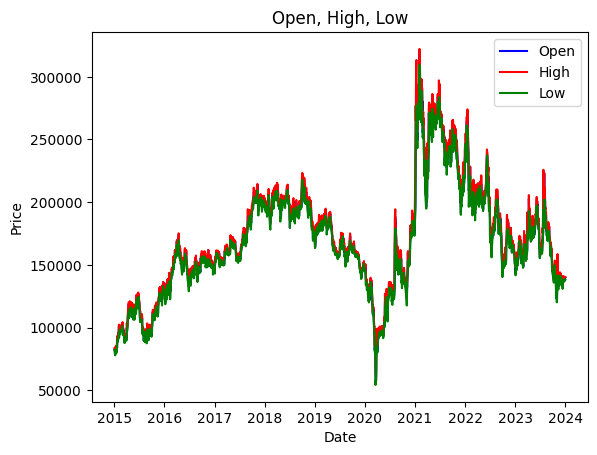

In [ ]:
import matplotlib.pyplot as plt

open_data = dfx['Open']
high_data = dfx['High']
low_data = dfx['Low']

plt.plot(open_data, color='blue', label='Open')
plt.plot(high_data, color='red', label='High')
plt.plot(low_data, color='green', label='Low')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Open, High, Low')

plt.legend()
plt.show()

In [ ]:
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

x_mm = mmsx.fit_transform(dfx)
y_mm = mmsy.fit_transform(dfy.to_frame())

x_mm.shape, y_mm.shape

((2215, 4), (2215, 1))

In [ ]:
window_size = 10

from tqdm import trange
x_data = []
y_data = []

for start in trange(len(y_mm) - window_size):
    stop = start + window_size
    print("start:", start, "stop:", stop)
    x_data.append(x_mm[start:stop])
    y_data.append(y_mm[stop])

 12%|█▏        | 262/2205 [00:00<00:00, 1953.91it/s]

start: 0 stop: 10
start: 1 stop: 11
start: 2 stop: 12
start: 3 stop: 13
start: 4 stop: 14
start: 5 stop: 15
start: 6 stop: 16
start: 7 stop: 17
start: 8 stop: 18
start: 9 stop: 19
start: 10 stop: 20
start: 11 stop: 21
start: 12 stop: 22
start: 13 stop: 23
start: 14 stop: 24
start: 15 stop: 25
start: 16 stop: 26
start: 17 stop: 27
start: 18 stop: 28
start: 19 stop: 29
start: 20 stop: 30
start: 21 stop: 31
start: 22 stop: 32
start: 23 stop: 33
start: 24 stop: 34
start: 25 stop: 35
start: 26 stop: 36
start: 27 stop: 37
start: 28 stop: 38
start: 29 stop: 39
start: 30 stop: 40
start: 31 stop: 41
start: 32 stop: 42
start: 33 stop: 43
start: 34 stop: 44
start: 35 stop: 45
start: 36 stop: 46
start: 37 stop: 47
start: 38 stop: 48
start: 39 stop: 49
start: 40 stop: 50
start: 41 stop: 51
start: 42 stop: 52
start: 43 stop: 53
start: 44 stop: 54
start: 45 stop: 55
start: 46 stop: 56
start: 47 stop: 57
start: 48 stop: 58
start: 49 stop: 59
start: 50 stop: 60
start: 51 stop: 61
start: 52 stop: 62
sta

 46%|████▋     | 1025/2205 [00:00<00:00, 1595.31it/s]

837
start: 828 stop: 838
start: 829 stop: 839
start: 830 stop: 840
start: 831 stop: 841
start: 832 stop: 842
start: 833 stop: 843
start: 834 stop: 844
start: 835 stop: 845
start: 836 stop: 846
start: 837 stop: 847
start: 838 stop: 848
start: 839 stop: 849
start: 840 stop: 850
start: 841 stop: 851
start: 842 stop: 852
start: 843 stop: 853
start: 844 stop: 854
start: 845 stop: 855
start: 846 stop: 856
start: 847 stop: 857
start: 848 stop: 858
start: 849 stop: 859
start: 850 stop: 860
start: 851 stop: 861
start: 852 stop: 862
start: 853 stop: 863
start: 854 stop: 864
start: 855 stop: 865
start: 856 stop: 866
start: 857 stop: 867
start: 858 stop: 868
start: 859 stop: 869
start: 860 stop: 870
start: 861 stop: 871
start: 862 stop: 872
start: 863 stop: 873
start: 864 stop: 874
start: 865 stop: 875
start: 866 stop: 876
start: 867 stop: 877
start: 868 stop: 878
start: 869 stop: 879
start: 870 stop: 880
start: 871 stop: 881
start: 872 stop: 882
start: 873 stop: 883
start: 874 stop: 884
start: 87

 54%|█████▎    | 1181/2205 [00:00<00:00, 1078.07it/s]

start: 1091 stop: 1101
start: 1092 stop: 1102
start: 1093 stop: 1103
start: 1094 stop: 1104
start: 1095 stop: 1105
start: 1096 stop: 1106
start: 1097 stop: 1107
start: 1098 stop: 1108
start: 1099 stop: 1109
start: 1100 stop: 1110
start: 1101 stop: 1111
start: 1102 stop: 1112
start: 1103 stop: 1113
start: 1104 stop: 1114
start: 1105 stop: 1115
start: 1106 stop: 1116
start: 1107 stop: 1117
start: 1108 stop: 1118
start: 1109 stop: 1119
start: 1110 stop: 1120
start: 1111 stop: 1121
start: 1112 stop: 1122
start: 1113 stop: 1123
start: 1114 stop: 1124
start: 1115 stop: 1125
start: 1116 stop: 1126
start: 1117 stop: 1127
start: 1118 stop: 1128
start: 1119 stop: 1129
start: 1120 stop: 1130
start: 1121 stop: 1131
start: 1122 stop: 1132
start: 1123 stop: 1133
start: 1124 stop: 1134
start: 1125 stop: 1135
start: 1126 stop: 1136
start: 1127 stop: 1137
start: 1128 stop: 1138
start: 1129 stop: 1139
start: 1130 stop: 1140
start: 1131 stop: 1141
start: 1132 stop: 1142
start: 1133 stop: 1143
start: 1134

 59%|█████▉    | 1296/2205 [00:01<00:01, 858.01it/s] 

start: 1195 stop: 1205
start: 1196 stop: 1206
start: 1197 stop: 1207
start: 1198 stop: 1208
start: 1199 stop: 1209
start: 1200 stop: 1210
start: 1201 stop: 1211
start: 1202 stop: 1212
start: 1203 stop: 1213
start: 1204 stop: 1214
start: 1205 stop: 1215
start: 1206 stop: 1216
start: 1207 stop: 1217
start: 1208 stop: 1218
start: 1209 stop: 1219
start: 1210 stop: 1220
start: 1211 stop: 1221
start: 1212 stop: 1222
start: 1213 stop: 1223
start: 1214 stop: 1224
start: 1215 stop: 1225
start: 1216 stop: 1226
start: 1217 stop: 1227
start: 1218 stop: 1228
start: 1219 stop: 1229
start: 1220 stop: 1230
start: 1221 stop: 1231
start: 1222 stop: 1232
start: 1223 stop: 1233
start: 1224 stop: 1234
start: 1225 stop: 1235
start: 1226 stop: 1236
start: 1227 stop: 1237
start: 1228 stop: 1238
start: 1229 stop: 1239
start: 1230 stop: 1240
start: 1231 stop: 1241
start: 1232 stop: 1242
start: 1233 stop: 1243
start: 1234 stop: 1244
start: 1235 stop: 1245
start: 1236 stop: 1246
start: 1237 stop: 1247
start: 1238

 71%|███████   | 1567/2205 [00:01<00:00, 935.23it/s]

 stop: 1531
start: 1522 stop: 1532
start: 1523 stop: 1533
start: 1524 stop: 1534
start: 1525 stop: 1535
start: 1526 stop: 1536
start: 1527 stop: 1537
start: 1528 stop: 1538
start: 1529 stop: 1539
start: 1530 stop: 1540
start: 1531 stop: 1541
start: 1532 stop: 1542
start: 1533 stop: 1543
start: 1534 stop: 1544
start: 1535 stop: 1545
start: 1536 stop: 1546
start: 1537 stop: 1547
start: 1538 stop: 1548
start: 1539 stop: 1549
start: 1540 stop: 1550
start: 1541 stop: 1551
start: 1542 stop: 1552
start: 1543 stop: 1553
start: 1544 stop: 1554
start: 1545 stop: 1555
start: 1546 stop: 1556
start: 1547 stop: 1557
start: 1548 stop: 1558
start: 1549 stop: 1559
start: 1550 stop: 1560
start: 1551 stop: 1561
start: 1552 stop: 1562
start: 1553 stop: 1563
start: 1554 stop: 1564
start: 1555 stop: 1565
start: 1556 stop: 1566
start: 1557 stop: 1567
start: 1558 stop: 1568
start: 1559 stop: 1569
start: 1560 stop: 1570
start: 1561 stop: 1571
start: 1562 stop: 1572
start: 1563 stop: 1573
start: 1564 stop: 1574

 84%|████████▍ | 1855/2205 [00:01<00:00, 864.53it/s]

stop: 1761
start: 1752 stop: 1762
start: 1753 stop: 1763
start: 1754 stop: 1764
start: 1755 stop: 1765
start: 1756 stop: 1766
start: 1757 stop: 1767
start: 1758 stop: 1768
start: 1759 stop: 1769
start: 1760 stop: 1770
start: 1761 stop: 1771
start: 1762 stop: 1772
start: 1763 stop: 1773
start: 1764 stop: 1774
start: 1765 stop: 1775
start: 1766 stop: 1776
start: 1767 stop: 1777
start: 1768 stop: 1778
start: 1769 stop: 1779
start: 1770 stop: 1780
start: 1771 stop: 1781
start: 1772 stop: 1782
start: 1773 stop: 1783
start: 1774 stop: 1784
start: 1775 stop: 1785
start: 1776 stop: 1786
start: 1777 stop: 1787
start: 1778 stop: 1788
start: 1779 stop: 1789
start: 1780 stop: 1790
start: 1781 stop: 1791
start: 1782 stop: 1792
start: 1783 stop: 1793
start: 1784 stop: 1794
start: 1785 stop: 1795
start: 1786 stop: 1796
start: 1787 stop: 1797
start: 1788 stop: 1798
start: 1789 stop: 1799
start: 1790 stop: 1800
start: 1791 stop: 1801
start: 1792 stop: 1802
start: 1793 stop: 1803
start: 1794 stop: 1804


100%|██████████| 2205/2205 [00:01<00:00, 1178.18it/s]

 2161
start: 2152 stop: 2162
start: 2153 stop: 2163
start: 2154 stop: 2164
start: 2155 stop: 2165
start: 2156 stop: 2166
start: 2157 stop: 2167
start: 2158 stop: 2168
start: 2159 stop: 2169
start: 2160 stop: 2170
start: 2161 stop: 2171
start: 2162 stop: 2172
start: 2163 stop: 2173
start: 2164 stop: 2174
start: 2165 stop: 2175
start: 2166 stop: 2176
start: 2167 stop: 2177
start: 2168 stop: 2178
start: 2169 stop: 2179
start: 2170 stop: 2180
start: 2171 stop: 2181
start: 2172 stop: 2182
start: 2173 stop: 2183
start: 2174 stop: 2184
start: 2175 stop: 2185
start: 2176 stop: 2186
start: 2177 stop: 2187
start: 2178 stop: 2188
start: 2179 stop: 2189
start: 2180 stop: 2190
start: 2181 stop: 2191
start: 2182 stop: 2192
start: 2183 stop: 2193
start: 2184 stop: 2194
start: 2185 stop: 2195
start: 2186 stop: 2196
start: 2187 stop: 2197
start: 2188 stop: 2198
start: 2189 stop: 2199
start: 2190 stop: 2200
start: 2191 stop: 2201
start: 2192 stop: 2202
start: 2193 stop: 2203
start: 2194 stop: 2204
start

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=3)

In [ ]:
# LSTM
data_size = dfx.shape[1]

model = Sequential()

model.add(LSTM(units=64, activation='relu', return_sequences=True,
				input_shape=X_train[0].shape))
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dropout(0.05))

model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            17664     
                                                                 
 bidirectional (Bidirection  (None, 10, 128)           66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 10, 128)           98816     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=5)

history = model.fit(np.array(X_train), np.array(y_train), validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop])

Epoch 1/200
45/45 [==============================] - 22s 71ms/step - loss: 0.0262 - mae: 0.1115 - val_loss: 0.0022 - val_mae: 0.0332
Epoch 2/200
45/45 [==============================] - 1s 23ms/step - loss: 0.0021 - mae: 0.0323 - val_loss: 0.0017 - val_mae: 0.0281
Epoch 3/200
45/45 [==============================] - 1s 23ms/step - loss: 0.0018 - mae: 0.0300 - val_loss: 0.0021 - val_mae: 0.0328
Epoch 4/200
45/45 [==============================] - 1s 24ms/step - loss: 0.0022 - mae: 0.0341 - val_loss: 0.0016 - val_mae: 0.0270
Epoch 5/200
45/45 [==============================] - 1s 24ms/step - loss: 0.0018 - mae: 0.0296 - val_loss: 0.0015 - val_mae: 0.0268
Epoch 6/200
45/45 [==============================] - 1s 26ms/step - loss: 0.0018 - mae: 0.0300 - val_loss: 0.0016 - val_mae: 0.0276
Epoch 7/200
45/45 [==============================] - 1s 27ms/step - loss: 0.0016 - mae: 0.0288 - val_loss: 0.0015 - val_mae: 0.0265
Epoch 8/200
45/45 [==============================] - 2s 37ms/step - loss: 0

<Axes: >

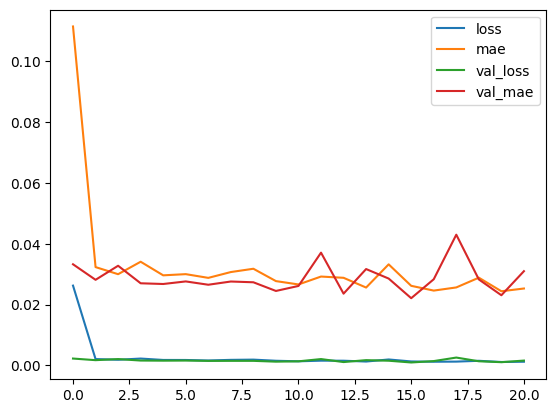

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
y_pred = model.predict(np.array(X_test))
y_pred[:5]

14/14 [==============================] - 2s 7ms/step


array([[0.66507757],
       [0.40776128],
       [0.434015  ],
       [0.5227669 ],
       [0.24916278]], dtype=float32)

In [ ]:
rmse = ((np.array(y_test) - np.array(y_pred)) ** 2).mean() ** 0.5
rmse

0.03622011765378302

<Axes: >

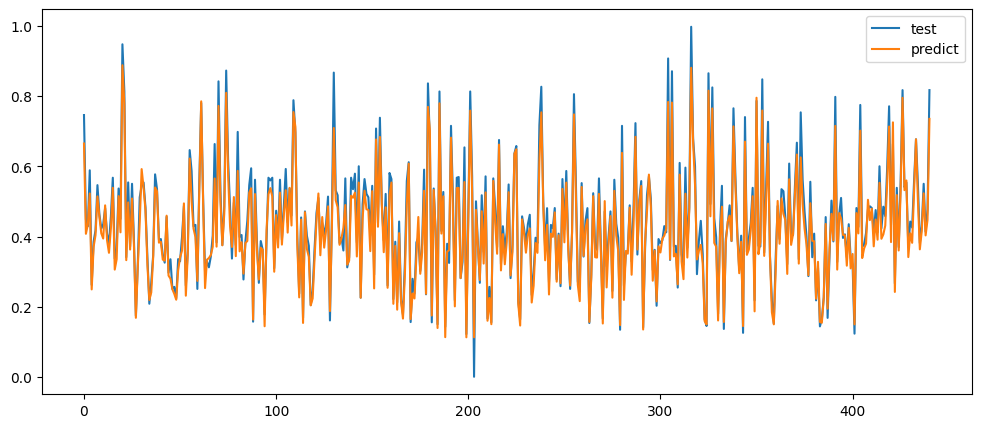

In [ ]:
pd.DataFrame({'test': np.array(y_test).flatten(), "predict": np.array(y_pred).flatten()}).plot(figsize=(12, 5))

In [ ]:
# 스케일링한 값 복원
y_predict_inverse = mmsy.inverse_transform(np.array(y_pred))
y_predict = y_predict_inverse.flatten()
y_predict[:5]

array([226655.81, 160776.67, 167498.27, 190220.86, 120171.65],
      dtype=float32)

In [ ]:
y_test_inverse = mmsy.inverse_transform(np.array(y_test))
y_test_inverse = y_test_inverse.flatten()

rmse = ((y_test_inverse - y_predict) ** 2).mean() ** 0.5
rmse

9273.22040850508

<Axes: >

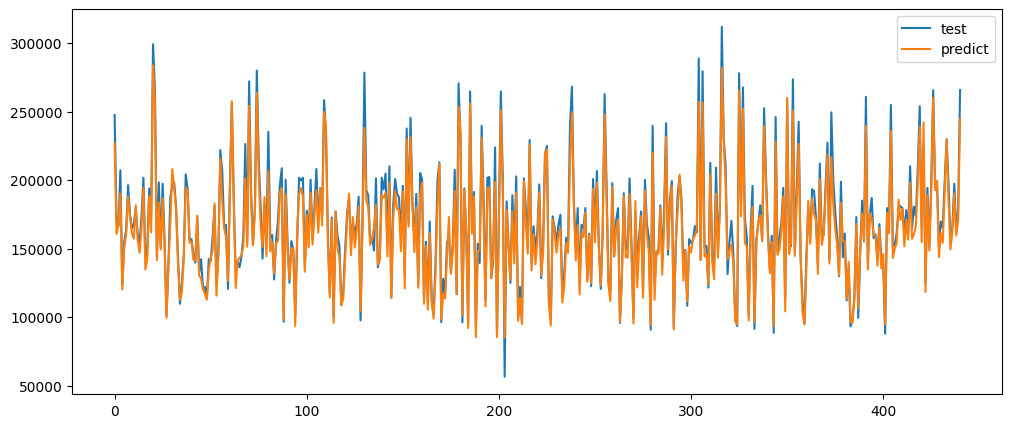

In [ ]:
pd.DataFrame({'test' : y_test_inverse, 'predict': y_predict}).plot(figsize=(12, 5))